# AN EUROPEAN PUT OPTION FINANCIAL DERIVATIVE FOR eBay


# QUESTION 1

In [232]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

We downloaded data for 1 year from Yfinance for the period October 2020 to October 2010

In [233]:
data = yf.download("EBAY", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  1 of 1 completed


The below shows the data for the first 5 months

In [234]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,52.980000,53.619999,51.509998,52.099998,51.365765,9083900
2020-10-01,52.369999,52.860001,52.000000,52.380001,51.641823,6659600
2020-10-02,51.610001,52.430000,51.189999,51.680000,50.951687,5456700
2020-10-05,51.939999,52.110001,51.150002,51.770000,51.040413,4954700
2020-10-06,51.910000,51.910000,49.490002,49.660000,48.960148,8824800


The below shows the data for the last 5 months

In [235]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-24,72.930000,73.400002,72.720001,72.989998,72.803772,3486600
2021-09-27,72.730003,73.809998,72.410004,73.669998,73.482040,4268700
2021-09-28,72.830002,73.669998,70.730003,71.260002,71.078194,5379600
2021-09-29,71.519997,71.830002,69.730003,69.970001,69.791481,5621400
2021-09-30,70.269997,70.660004,69.620003,69.669998,69.492241,3927200


In [236]:
data[['Adj Close']].head()

,Adj Close
Date,
2020-09-30,51.365765
2020-10-01,51.641823
2020-10-02,50.951687
2020-10-05,51.040413
2020-10-06,48.960148


The below code calculates the annualised volatility for Ebay stock for the period in review

In [237]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [238]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 34.83 %


Plotting the graph of the movement of eBay Inc over a year

In [244]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%')

The first six months volatility is 37.1 %


In [243]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')

The last six months volatility is 32.7 %


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F03EF08AC8>],
      dtype=object)

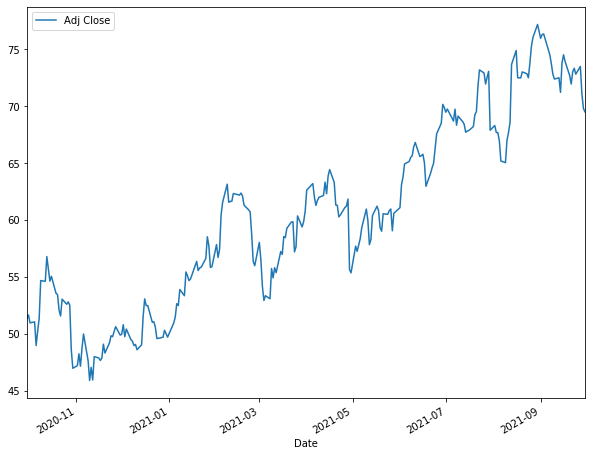

In [239]:
data[['Adj Close']].plot(figsize=(10, 8), subplots=True)

In [240]:
data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,253.00,253.00,253.00,253.00,253.00,253.00
mean,60.79,61.64,60.03,60.85,60.36,7641890.91
std,8.09,8.10,8.08,8.11,8.24,3556527.32
min,46.90,47.64,45.36,46.54,45.88,2718500.00
25%,53.88,54.89,53.01,53.79,53.34,5506000.00
50%,60.68,61.38,59.66,60.86,60.38,6597300.00
75%,67.25,68.19,66.75,67.90,67.57,8999200.00
max,77.49,77.83,76.57,77.55,77.17,31082000.00


In [241]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,-0.0116,-0.0143,0.0095,0.0054,0.0054,-0.3104
2020-10-02,-0.0146,-0.0082,-0.0157,-0.0135,-0.0135,-0.1992
2020-10-05,0.0064,-0.0061,-0.0008,0.0017,0.0017,-0.0965
2020-10-06,-0.0006,-0.0038,-0.0330,-0.0416,-0.0416,0.5772


This is the log returns for eBay Inc for the period

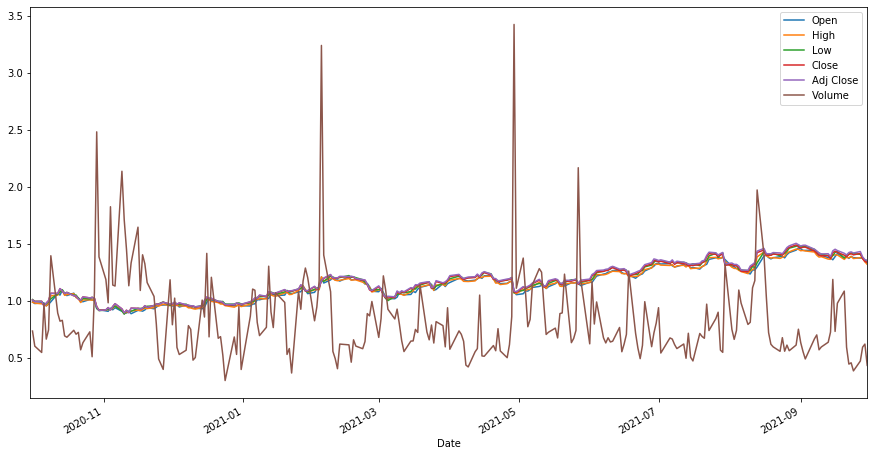

In [242]:
rets.cumsum().apply(np.exp).plot(figsize=(15, 8));

In [222]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.005359897466052865,
 -0.013453922746011137,
 0.0017400110215000316,
 -0.04161122010217453,
 0.02544880066822205]

In [223]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f' % (lr,lv))

The annualized log return is 0.30224321 and its annualized volatility is 0.34831342


A plot of eBay Inc volatility

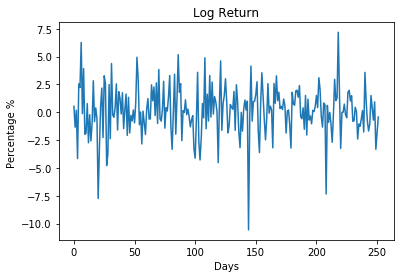

In [224]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F03D543DD8>],
      dtype=object)

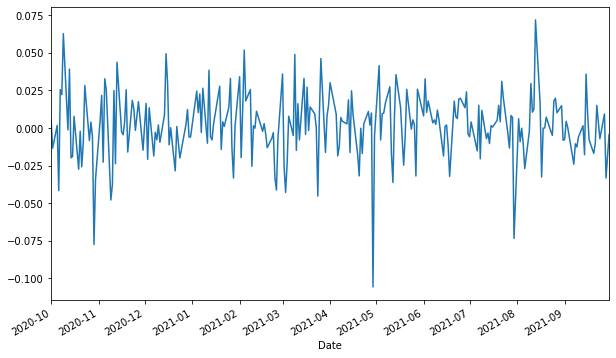

In [245]:
log_return.dropna(inplace=True)
log_return.plot(subplots=True, figsize=(10, 6))

# QUESTION 2

# METHODOLOGY

# Binomial Tree

In [113]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 69.49


In [230]:
S0 = 69.49              # This is eBay spot stock price
K = 75.00               # This is our strike price
T = 1.0                 # Time to maturity 
r = 0.0153              # This is the risk free rate 
sig = 0.3483            # This is volatility
N = 3                   # Represents the number of periods or number of time steps  
payoff = "put"          # This is the payoff 

The risk free rate was derived from Bloomberg website.  
We assume a dividend yield of 0 for this calculation i.e we assume no dividend in order to use this computation.

In [115]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u 

In [116]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [117]:
S

array([[ 69.49      ,  84.96793551, 103.8933669 , 127.03417612],
       [  0.        ,  56.83155735,  69.49      ,  84.96793551],
       [  0.        ,   0.        ,  46.47900289,  56.83155735],
       [  0.        ,   0.        ,   0.        ,  38.01229124]])

We calculate for both p and q to see the uptrend and downtrend

In [118]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p                     #uptrend

0.4625238838580554

In [119]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
P = 1.0 - q           # risk neutral down probability
q                     #downtrend

0.5374761161419446

In [120]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 18.16844265],
       [ 0.        ,  0.        ,  0.        , 36.98770876]])

This is an European Option.

In [121]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[12.82785732,  5.19524747,  0.        ,  0.        ],
       [ 0.        , 19.51811468,  9.71542874,  0.        ],
       [ 0.        ,  0.        , 28.13947083, 18.16844265],
       [ 0.        ,  0.        ,  0.        , 36.98770876]])

In [122]:
print('European ' + payoff, str( V[0,0]))

European put 12.827857324194216


# MonteCarlo Simulation 

In [123]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [225]:
T = 1                    #Time to maturity
r = 0.0153               #This is the risk free rate
sigma = 0.3483           # This is volatility
S0 = 69.49               # This is Ebay spot stock price
K = 75.00                # This is our strike price


The MonteCarlo Simulation was run 10,000 times for accuracy

In [125]:
S = mcs_simulation_np(10000)

In [126]:
S = np.transpose(S)
S

array([[69.49      , 69.25615512, 69.25902395, ..., 69.81997647,
        70.00437731, 70.12877955],
       [69.49      , 69.50457638, 69.69870885, ..., 81.72675371,
        82.0562723 , 82.26865306],
       [69.49      , 69.34352642, 69.16106242, ..., 56.17777516,
        56.12550672, 55.95120128],
       ...,
       [69.49      , 69.11583474, 69.23178736, ..., 54.06215174,
        54.35096466, 54.52377417],
       [69.49      , 69.17496113, 69.14517839, ..., 95.33530607,
        95.0705464 , 94.85878088],
       [69.49      , 69.75755176, 69.89438295, ..., 61.40226622,
        61.0817408 , 61.11724941]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

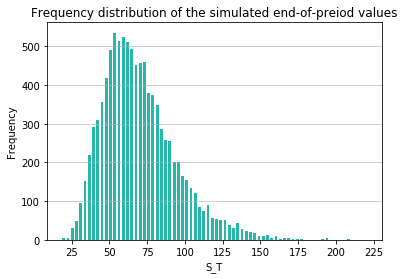

In [140]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#02aa99',alpha=0.85, rwidth=0.65)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [48]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 12.381276140284102


# GREEKS

# DELTA

DELTA – is the amount an option price is expected to move based on a 1dollar move up on the underlying stock. So it measures the rate of change in our option price if eBay's price moves up by 1dollar.

In [228]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [229]:
delta(69.49, 75.00, 1, 0.0153, 0.099, 0.3483, 'put')


-0.5545586826635466

Below is the 2D plot for Delta for eBay Inc

In [145]:
S = np.linspace(60,140,41)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

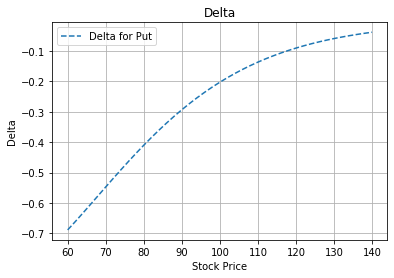

In [146]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

Here, we plot the Delta for eBay Inc in 3D

In [64]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [153]:
S = np.linspace(60, 140, 41)
T = np.linspace(0.5, 4, 41)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 75.00, T[i], 0.0153, 0.099, 0.3483, 'put')

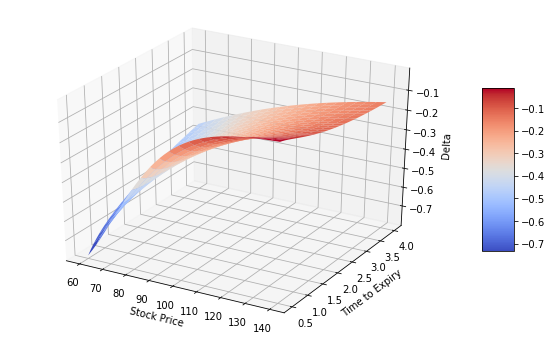

In [154]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# GAMMA

GAMMA measures the rate of change in the delta based on a 1dollar change in stock price. 

In [156]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [157]:
gamma(69.49, 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

0.014334142676215036

In [158]:
S = np.linspace(60,140,41)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

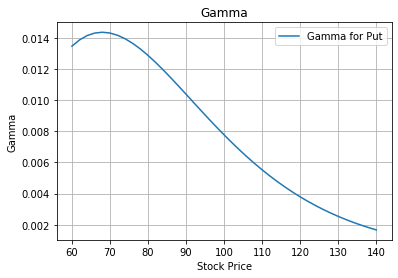

In [159]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [160]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [161]:
S = np.linspace(60, 140, 41)
T = np.linspace(0.5, 4, 41)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 75.00, T[i], 0.0153, 0.099, 0.3483, 'put')

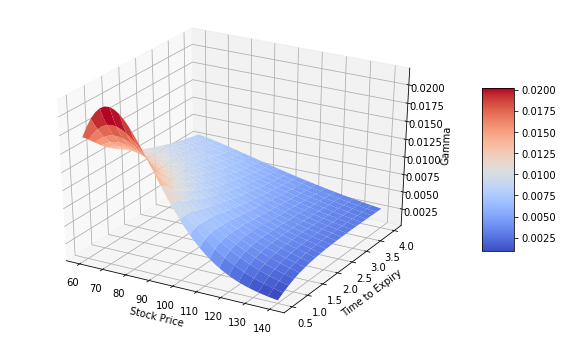

In [162]:
 fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# SPEED

In [163]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [164]:
speed(69.49, 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

-3.7346977094366976e-05

In [165]:
S = np.linspace(60,140,41)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

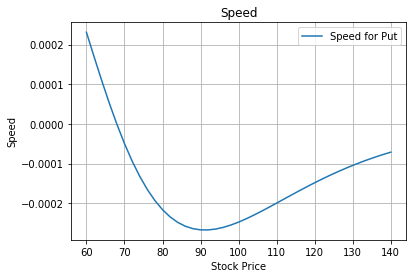

In [166]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [168]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [173]:
S = np.linspace(60, 140, 41)
T = np.linspace(0.5, 4, 41)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 75.00, T[i], 0.0153, 0.099, 0.3483, 'put')

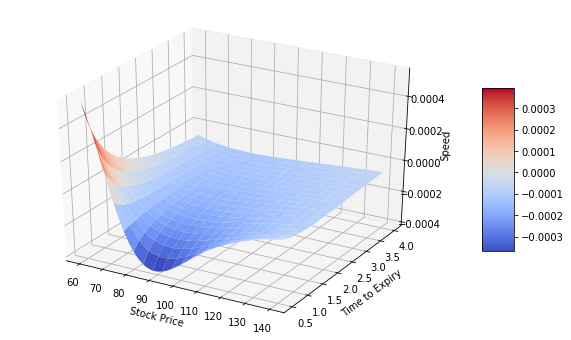

In [174]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# THETA

– (aka Time Decay) is the amount the price of calls & puts will decrease everyday as the option approaches its expiration date. It measures the sensitivity of the value of the derivative to the passage of time!

In [175]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [176]:
theta(69.49, 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

1.2160507452946347

2D Graph of Theta

In [177]:
T = np.linspace(60,140,41)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(69.49, 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

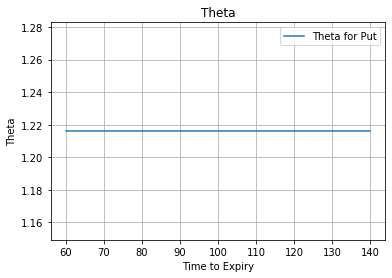

In [178]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [179]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

3D Graph of Theta

In [182]:
S = np.linspace(60, 140, 41)
T = np.linspace(0.5, 4, 41)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 75.00, T[i], 0.0153, 0.099, 0.3483, 'put')

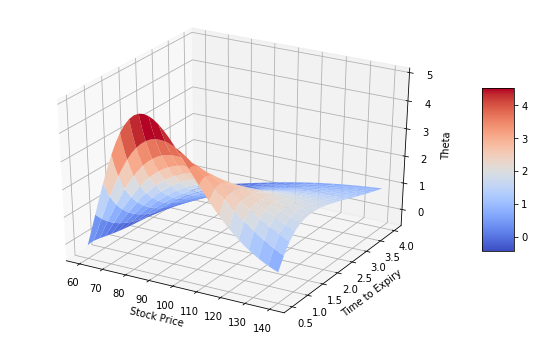

In [183]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# RHO

Rho, 𝜌, measures sensitivity to the interest rate

In [193]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [194]:
rho(69.49, 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

-54.42163676811292

2D Graph of Rho

In [195]:
r = np.linspace(0,0.5,41)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(69.49, 75.00, 1, r[i], 0.099, 0.3483, 'put')

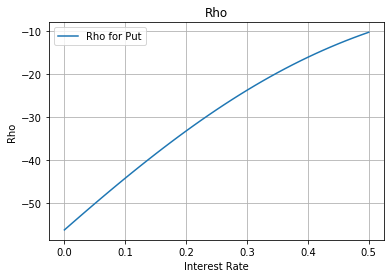

In [196]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [197]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

3D Graph of Rho

In [198]:
S = np.linspace(60, 140, 41)
T = np.linspace(0.5, 4, 41)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 75.00, T[i], 0.0153, 0.099, 0.3483, 'put')

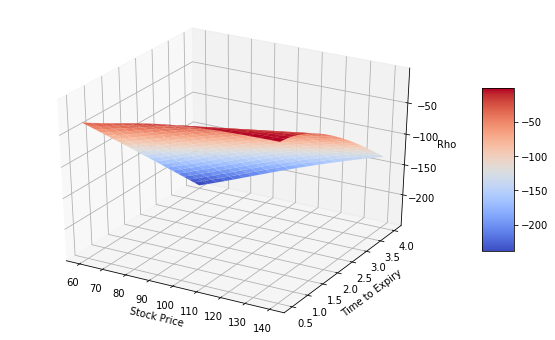

In [199]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# VEGA

Vega measures the amount call or put prices will change for every 1% change in implied volatility.

In [200]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [201]:
vega(69.49, 75.00, 1, 0.0153, 0.099, 0.3483, 'put')

24.108479504526

2D Graph of Vega 

In [202]:
vol = np.linspace(0.1,0.5,41)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(69.49, 75.00, 1, 0.0153, 0.099, vol[i], 'put')

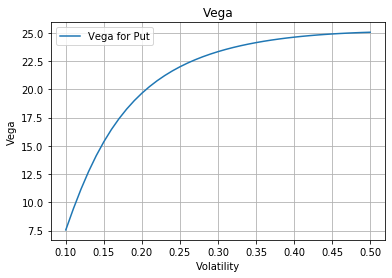

In [203]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

In [204]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

3D graph of Vega

In [205]:
S = np.linspace(60, 140, 41)
T = np.linspace(0.5, 4, 41)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 75.00, T[i], 0.0153, 0.099, 0.3483, 'put')

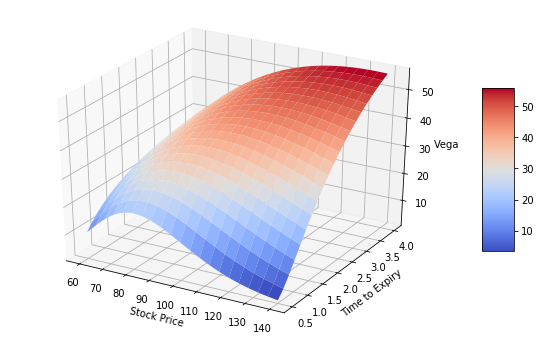

In [206]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);